<a href="https://www.kaggle.com/code/anderaraujo/sleep-disorder-prediction-grad-boosting-vs-svm?scriptVersionId=163754718" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# SLEEP DISORDER PREDICTION


#### Features

* Person ID: An identifier for each individual.

* Gender: The gender of the person (Male/Female).

* Age: The age of the person in years.

* Occupation: The occupation or profession of the person.

* Sleep Duration (hours): The number of hours the person sleeps per day.

* Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

* Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

* Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

* BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

* Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

* Heart Rate (bpm): The resting heart rate of the person in beats per minute.

* Daily Steps: The number of steps the person takes per day.

* Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

## Importing Libs and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Splitting Data

Spliting data before transformations

In [3]:
x = df.drop(columns = ['Person ID','Sleep Disorder'])
y = df['Sleep Disorder'].fillna('None')
np.random.seed(123)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)

# Exploring Data

In [4]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 12 to 365
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   280 non-null    object 
 1   Age                      280 non-null    int64  
 2   Occupation               280 non-null    object 
 3   Sleep Duration           280 non-null    float64
 4   Quality of Sleep         280 non-null    int64  
 5   Physical Activity Level  280 non-null    int64  
 6   Stress Level             280 non-null    int64  
 7   BMI Category             280 non-null    object 
 8   Blood Pressure           280 non-null    object 
 9   Heart Rate               280 non-null    int64  
 10  Daily Steps              280 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 26.2+ KB


In [5]:
xtrain.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,42.203571,7.146071,7.342857,58.832143,5.332143,70.146429,6793.214286
std,8.710270,0.788119,1.213847,20.550585,1.774077,4.251500,1623.105024
min,28.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.750000,6.500000,6.000000,45.000000,4.000000,68.000000,5425.000000
50%,42.000000,7.200000,8.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Observations about statistics
- Age vary from 28 to 59 with average of 42
- 75% of people are older than 35
- Sleep duration vary from 5.8 hours to 8.5 hours with average of 7.14 hours
- Most part of people have activity level higher than level 45 with more than 5425 steps per day

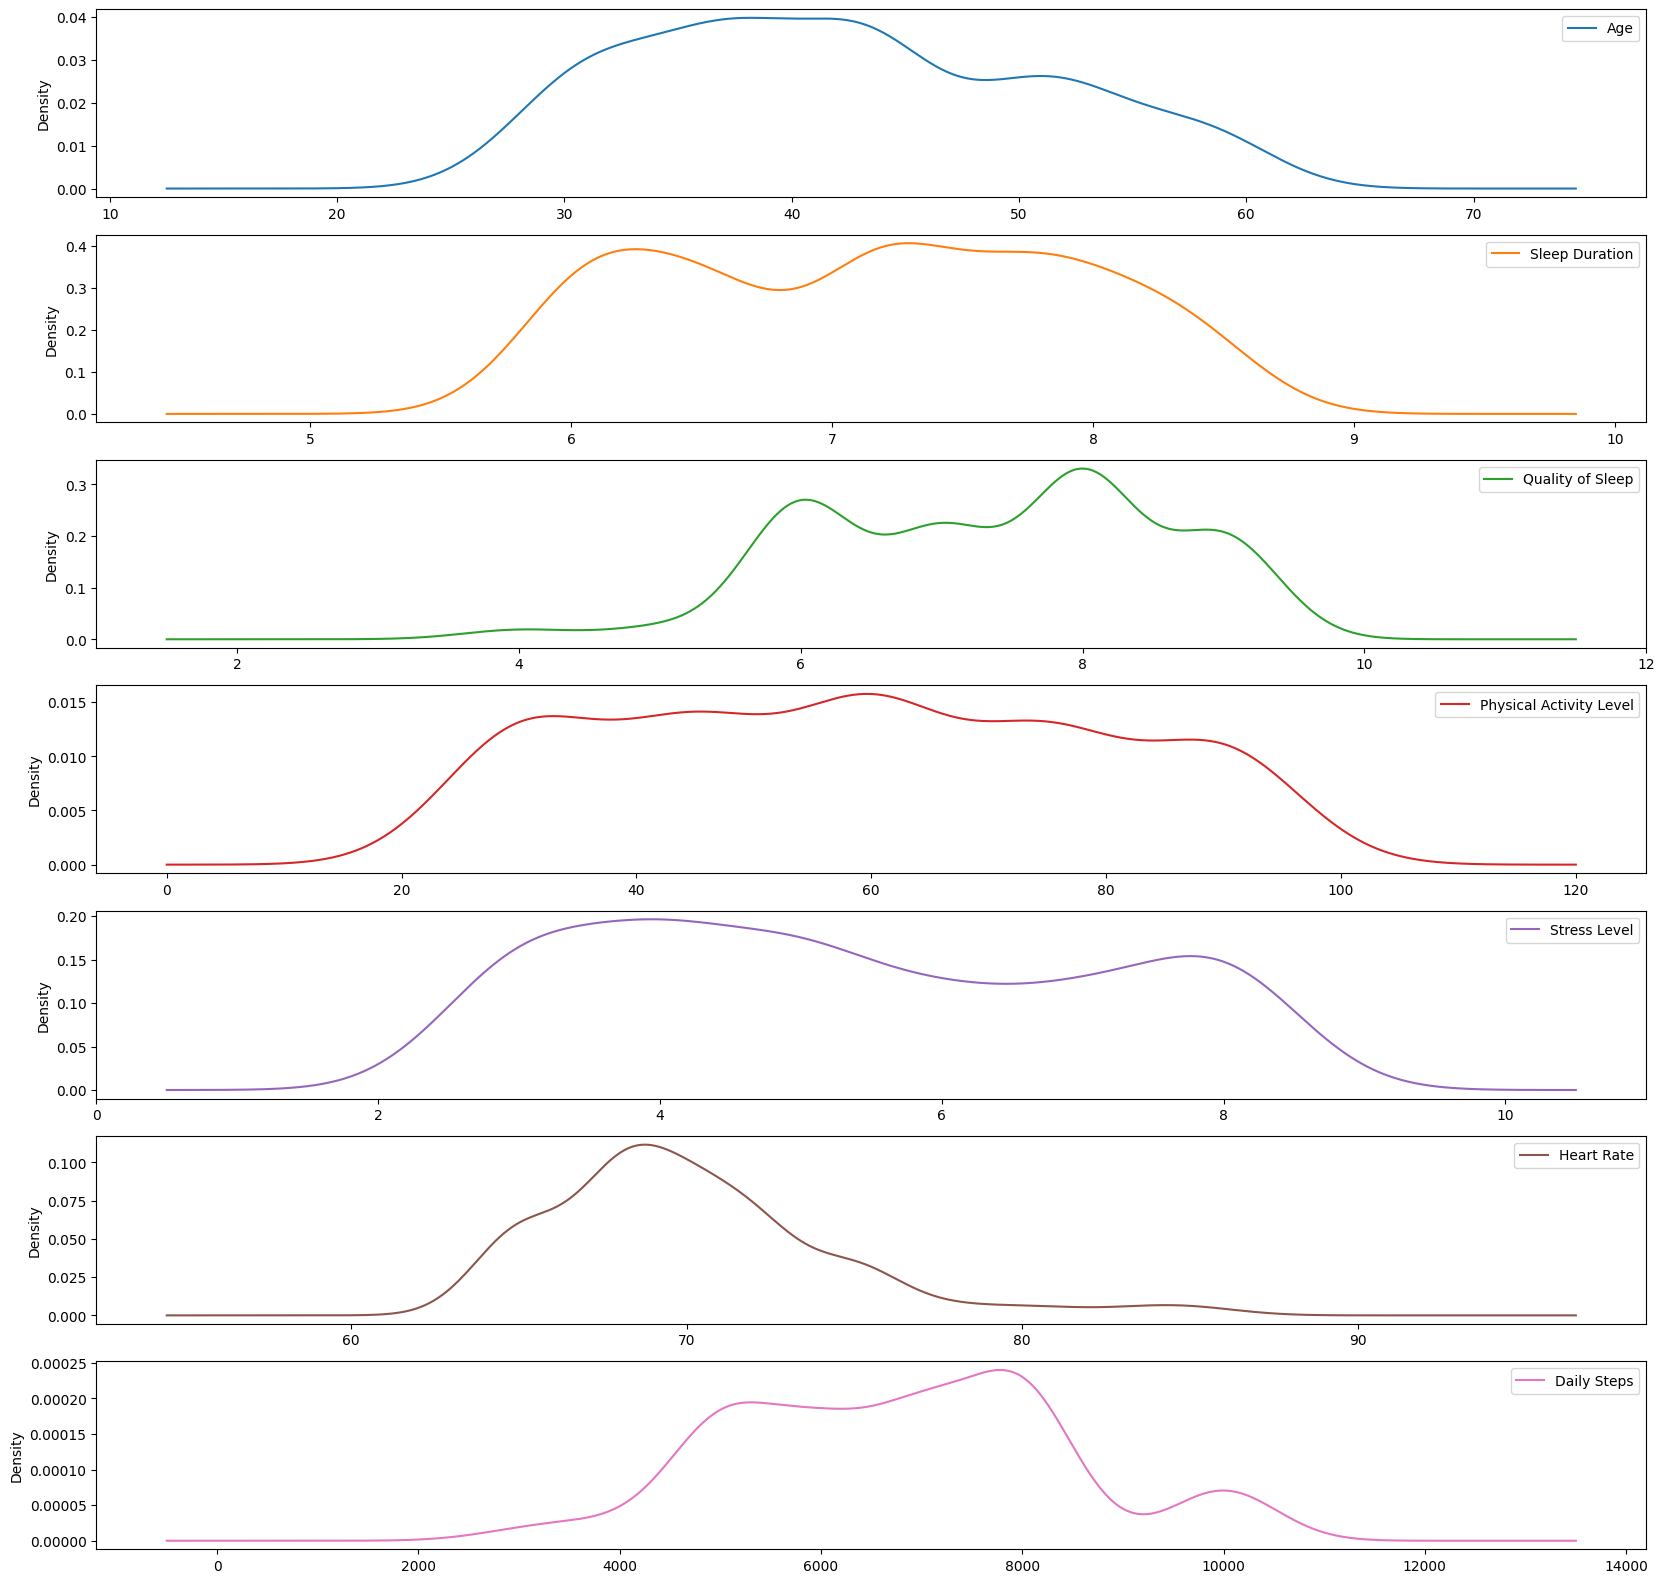

In [6]:
ax = xtrain.plot(kind = 'kde', subplots = True, sharex = False, sharey = False, figsize = (20,20))

Let's see how many uniques do we have for each variable

In [7]:
xtrain.nunique()

Gender                      2
Age                        30
Occupation                 10
Sleep Duration             27
Quality of Sleep            6
Physical Activity Level    16
Stress Level                6
BMI Category                4
Blood Pressure             25
Heart Rate                 18
Daily Steps                20
dtype: int64

Let's see every unique value in the columns

In [20]:
for col in xtrain.columns:
    print(f'{xtrain[col].unique()}\n\n')

['Male' 'Female']


[29 48 39 32 30 50 43 41 53 35 52 38 36 28 44 33 54 37 57 59 31 49 51 58
 56 34 45 40 42 55]


['Doctor' 'Engineer' 'Nurse' 'Lawyer' 'Accountant' 'Teacher'
 'Software Engineer' 'Salesperson' 'Sales Representative' 'Scientist']


[6.1 7.3 6.5 6.  6.4 7.7 7.8 7.6 8.5 7.4 6.6 7.1 7.2 5.9 6.3 7.9 8.4 7.5
 8.2 8.1 8.3 8.  6.9 5.8 6.7 6.2 6.8]


[6 7 5 8 9 4]


[30 65 40 35 90 75 60 45 50 32 70 55 85 47 80 42]


[8 5 7 6 3 4]


['Normal' 'Obese' 'Overweight' 'Normal Weight']


['120/80' '142/92' '132/87' '125/80' '130/86' '140/95' '130/85' '135/88'
 '129/84' '140/90' '115/75' '135/90' '128/85' '118/75' '131/86' '121/79'
 '122/80' '118/76' '119/77' '139/91' '117/76' '125/82' '115/78' '126/83'
 '128/84']


[70 83 80 72 78 75 65 84 68 74 85 81 73 86 76 69 67 77]


[ 8000  3500  4000  5000  4100 10000  3300  6000  4800  3000  7000  5500
  5200  6200  6800  7300  3700  7500  4200  5600]




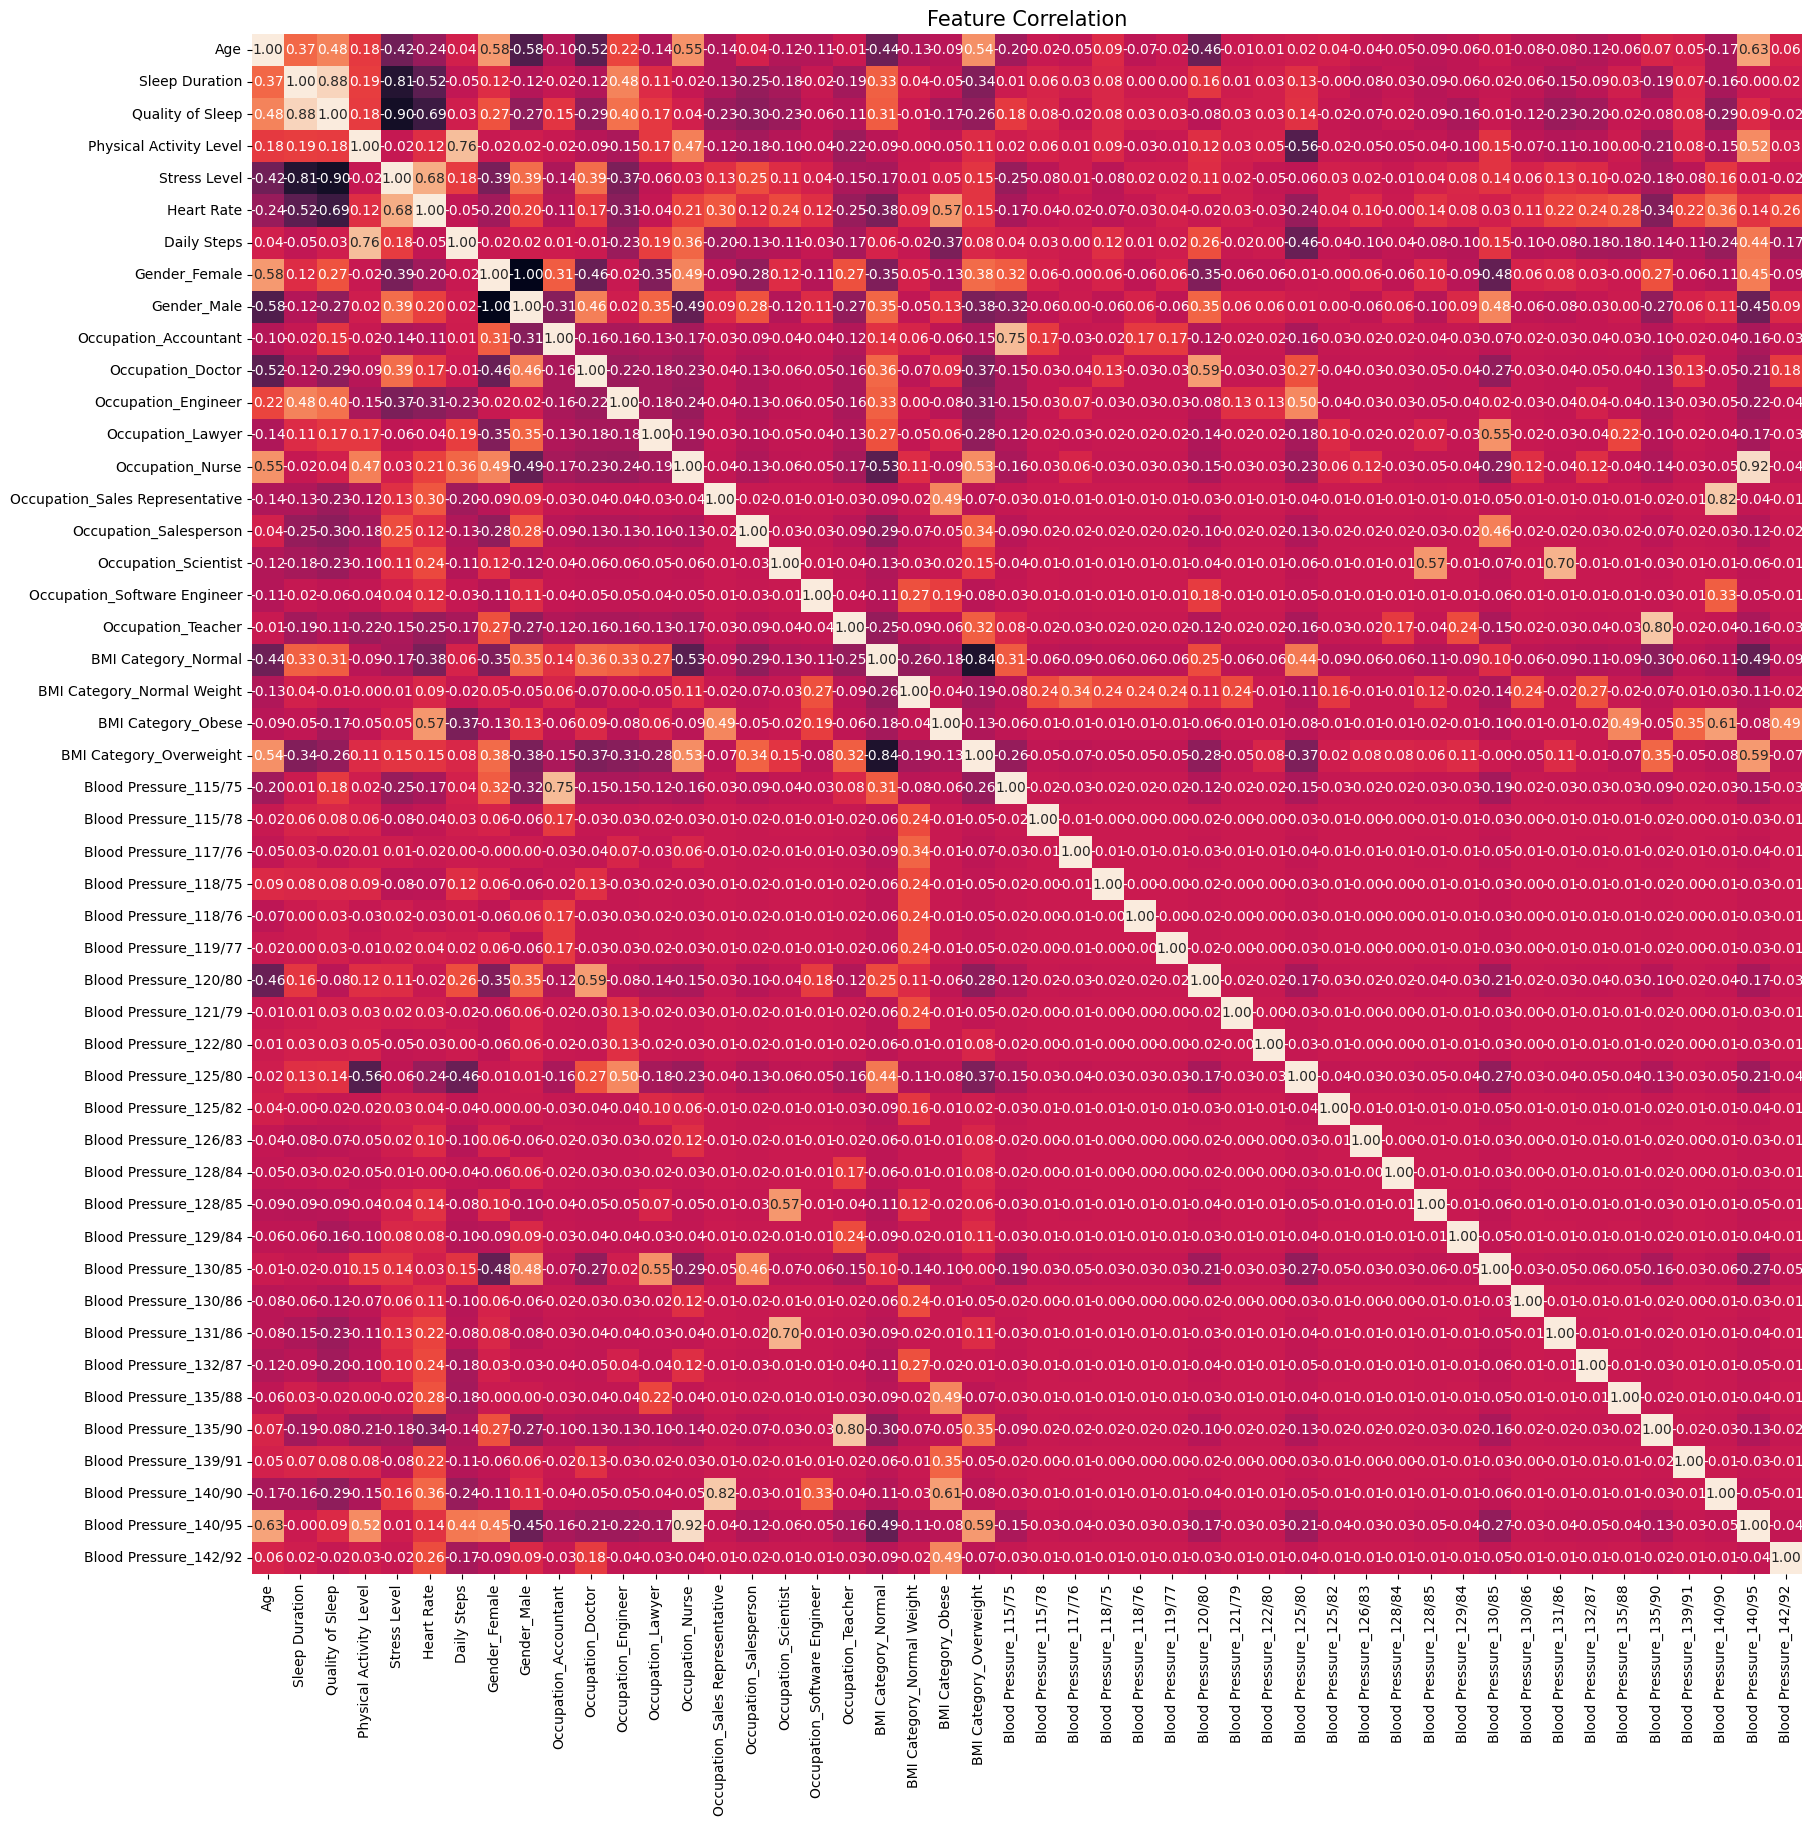

In [29]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(pd.get_dummies(xtrain).corr(), annot = True, fmt= '.2f', cbar=False)
ax.set_title('Feature Correlation', fontdict = {'size':15})
plt.show()

#### Here we can see that Quality of Sleep and Sleep Duration are highly correlated as well as Physical Activity Level and Daily Steps. We could remove one of them. However Sleep duration does not mean Quality of sleep and Daily Steps not completely explain Physical Activity level

#### Observations:

* Age and Blood Pressure have a positive correlation: As Age increases Blood Pressure also increases
* Stress Level and Sleep duration are negatively correlated. When people sleep more they reduce their stress level.
* Stress Level and Heart rate are positively correlated, because Stress increases heart rate.
* People with high BMI tend to have higher Blood Pressure.



## Creating functions for Feature Engineering inside Pipeline

Function to transform columns

In [30]:
def columns_transformer(data):
    bmi_levels = {'Normal':1, 'Obese':3, 'Overweight':2, 'Normal Weight':1}
    data['BMI Category'] = data['BMI Category'].replace(bmi_levels)
    data[['Blood Pressure fn','Blood Pressure ln']] = data['Blood Pressure'].str.split("/", expand = True)
    data['Blood Pressure fn'] = data['Blood Pressure fn'].astype('int64')
    data['Blood Pressure ln'] = data['Blood Pressure ln'].astype('int64')
    data = data.drop(columns = ['Blood Pressure'])
    return data.select_dtypes(include = 'object')

## Creating Pipelines for Numerical and Categorical Features

In [47]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.svm import LinearSVC as SVC
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

categorical_transformer = Pipeline(steps = [
    ('col_transf', FunctionTransformer(columns_transformer)),
    ('one_hot', OneHotEncoder(sparse_output = False, handle_unknown= 'ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('knn_imputer', KNNImputer()),
    ('scaler', StandardScaler())
])

## Separating Categorical and Numerical Columns

In [32]:
# Getting numerical and categorical column names
cat_cols = xtrain.select_dtypes(include = 'object').columns
num_cols = xtrain.select_dtypes(exclude = 'object').columns

## Creating Preprocessing Pipeline

Setting the PReprocessing Pipeline

In [33]:
prep_pipe = ColumnTransformer(transformers = [
    ('cat_transf', categorical_transformer, cat_cols),
    ('num_transf', numerical_transformer, num_cols)
])

## Setting Parameters Grid for tunning

In [34]:
# Setting Parameter Grid for Tuning
param_grid_gbc = {
    'gbc__n_estimators':[100,300,500],
    'gbc__learning_rate':[0.001, 0.01, 0.1, 1],
    'gbc__max_depth':[1, 3, 5, 7],
    'gbc__random_state':[123]
}

param_grid_svc = {
    'svc__C':[0.001, 0.01, 0.1, 1],
    'svc__tol':[0.001, 0.01, 0.1],
    'svc__random_state':[123]
}



## Creating Complete Pipelines

In [35]:
final_pipeline_gbc = Pipeline(steps=[
    ('preprocess',prep_pipe),
    ('gbc', GBC())
])

final_pipeline_svc = Pipeline(steps=[
    ('preprocess',prep_pipe),
    ('svc', SVC())
])

grid_search_gbc = GridSearchCV(final_pipeline_gbc, param_grid_gbc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc = GridSearchCV(final_pipeline_svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_gbc.fit(xtrain, ytrain)
grid_search_svc.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_transf',
                                                                         Pipeline(steps=[('col_transf',
                                                                                          FunctionTransformer(func=<function columns_transformer at 0x7bb3266f05e0>)),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], dtype='obj...
                                                                         Pipeline(steps=[('knn_imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object'))])),
                                       ('svc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1],
                         'svc__random_state': [123],
                         'svc__tol': [0.001, 0.01, 0.1]},
             scoring='accuracy')

## Evaluating Models

Let's Compare the best Accuracy for this models

In [41]:
scores = cross_val_score(grid_search_gbc, xtrain, ytrain, cv = 5, scoring = 'accuracy')
score_min = scores.mean() - (2 * scores.std())
score_max = scores.mean() + (2 * scores.std())

print(f'scores can vary from {round(score_min, 3)} to {round(score_max, 3)} with mean of {round(scores.mean(), 3)}')

scores can vary from 0.811 to 0.939 with mean of 0.875


In [42]:
scores = cross_val_score(grid_search_svc, xtrain, ytrain, cv = 5, scoring = 'accuracy')
score_min = scores.mean() - (2 * scores.std())
score_max = scores.mean() + (2 * scores.std())

print(f'scores can vary from {round(score_min, 3)} to {round(score_max, 3)} with mean of {round(scores.mean(), 3)}')

scores can vary from 0.837 to 0.942 with mean of 0.889


Support Vector Classifier was a bit better tham Gradient Boost so let's predict with it

In [46]:
predictions = cross_val_predict(grid_search_gbc, xtrain, ytrain, cv =5)

In [49]:
print(classification_report(ytrain, predictions))

              precision    recall  f1-score   support

    Insomnia       0.84      0.77      0.80        56
        None       0.89      0.96      0.93       161
 Sleep Apnea       0.85      0.75      0.80        63

    accuracy                           0.88       280
   macro avg       0.86      0.83      0.84       280
weighted avg       0.87      0.88      0.87       280



In [51]:
validation_preds = cross_val_predict(grid_search_gbc, xtest, ytest, cv =5)
print(classification_report(ytest, validation_preds))

              precision    recall  f1-score   support

    Insomnia       0.85      0.81      0.83        21
        None       0.88      0.90      0.89        58
 Sleep Apnea       0.80      0.80      0.80        15

    accuracy                           0.86        94
   macro avg       0.84      0.84      0.84        94
weighted avg       0.86      0.86      0.86        94



# Conclusion
- In the validation data our accuracy and f1-score's got down
- Considering predictions on train data, our model generalized well on test data.

For this project I will stop here. However it could be done an extensive work trying to improve metrics to get better results.